In [1]:
import os
import geopandas as gp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from pylab import *
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

In [3]:
# latlon_1degree_SJ_last=path+'/global_grid.shp'
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
excel_dir=os.path.join(output_dir,f'stastics_excel')

gdb=os.path.join(output_dir,f'7_correct_temp_file.gdb')
fig_path=r'D:\lakemapping\10_paper_writting\figure\v6_250321'
os.makedirs(fig_path,exist_ok=True)
# latlon_1degree_SJ_last_data = gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')

global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve_except_Antarctica.shp'
Arid_Region=r'D:\lakemapping\0_auxiliary_data\AI\Global-AI_ET0_annual_v3\Global-AI_ET0_v3_annual\Global_AI_Reclassify_Clip_simple.shp'

color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝
red_color_list=['#311d3f','#522546','#88304e']
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e','f']

# lake_category_bins=[0.005,0.01,1,100,10000,1000000]
# lake_category_labels=['Tiny','Small','Medium','Large','Super large']

lake_category_bins=[0.005,0.01,1,100,10000,1000000]
lake_category_labels=['1','3','10','100']

In [4]:
latlon_1degree_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_hu_Count_Area')
latlon_1degree_SJ_last_data

,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,Lon_left,...,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100,hu_a_bt1_10,hu_c_bt1_10,geometry
0,1,2,7035.675627,1,1,0,0,0,-56,-72,...,0,0,0,0.008277,0.000000,0.000000,0.000000,0.000000,0,"MULTIPOLYGON (((-72.00000 -56.00000, -72.00000..."
1,186,3,7035.675627,184,33,60,55,34,-56,-71,...,56,53,27,12.307538,1.039664,2.839164,6.704510,4.052528,115,"MULTIPOLYGON (((-71.00000 -56.00000, -71.00000..."
2,436,4,7035.675627,432,98,124,108,95,-56,-70,...,120,92,52,50.037233,2.068706,5.377594,13.719308,8.579400,232,"MULTIPOLYGON (((-70.00000 -56.00000, -70.00000..."
3,533,5,7035.675627,529,137,188,144,58,-56,-69,...,132,44,9,5.547762,2.239651,2.430952,1.974050,11.462034,332,"MULTIPOLYGON (((-69.00000 -56.00000, -69.00000..."
4,527,6,7035.675627,521,124,151,155,84,-56,-68,...,-33,-12,-10,0.571354,-0.438920,-0.905766,-0.367784,11.513529,306,"MULTIPOLYGON (((-68.00000 -56.00000, -68.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16804,65,18045,2698.461110,60,18,16,16,10,77,103,...,16,16,7,4.392726,0.267759,0.925671,2.776069,1.193430,32,"MULTIPOLYGON (((103.00000 77.00000, 103.00000 ..."
16805,62,18046,2698.461110,62,21,27,8,5,77,104,...,27,8,5,4.210387,0.429799,0.431722,1.202110,0.861521,35,"MULTIPOLYGON (((104.00000 77.00000, 104.00000 ..."
16806,47,18047,2698.461110,45,19,13,7,4,77,105,...,12,6,3,7.155236,0.200577,0.303044,0.645353,0.608177,20,"MULTIPOLYGON (((105.00000 77.00000, 105.00000 ..."
16807,13,18048,2698.461110,13,4,5,3,1,77,106,...,-2,3,1,0.401006,-0.027417,0.130375,0.265666,0.213658,8,"MULTIPOLYGON (((106.00000 77.00000, 106.00000 ..."


In [5]:
Lat_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= Lat_data['Lat_down'].values
Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lon_left,...,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100,hu_a_bt1_10,hu_c_bt1_10
0,-56,1735,27,42214.053764,1718,403,543,472,281,-417,...,527,277,172,74,67.171115,4.959826,9.629766,20.703206,36.544138,1015
1,-55,4229,192,86540.078310,4188,1171,1298,987,664,-601,...,1896,800,653,408,220.699576,14.075547,36.608762,101.531334,77.670946,2285
2,-54,4029,252,59083.016148,3993,1018,1238,949,684,-572,...,1621,802,544,265,-1564.043066,14.035021,30.209521,51.487609,75.328039,2187
3,-53,4034,573,98237.566654,4009,1109,1321,896,605,-653,...,1398,813,431,149,-2096.931058,13.864983,22.765979,35.964117,71.983689,2217
4,-52,4695,754,100434.094704,4650,1014,1382,1176,944,-880,...,1159,631,396,128,-256.044512,11.003772,22.006495,25.795531,91.224367,2558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,73,85557,2224160,449497.286762,84688,25535,27780,17838,12038,1446,...,10929,7095,2260,1240,1673.288001,115.584038,134.131660,244.062929,1461.968437,45618
130,74,20054,1904915,359714.739651,19750,5427,6096,4415,3413,382,...,4434,2255,1142,925,717.998134,37.013279,64.534344,244.054391,352.381244,10511
131,75,17087,2184767,383876.442532,16866,5122,5570,3536,2299,781,...,4449,2401,1263,677,654.712713,41.097217,71.810755,176.547819,292.116448,9106
132,76,12821,1967602,320119.835898,12680,4300,4583,2458,1183,-2208,...,4775,2721,1387,595,579.090750,46.797857,74.579374,150.934635,211.274072,7041


In [6]:
Lon_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= Lon_data['Lon_left'].values
Lon_data

,Lon_left,Join_Count,TARGET_FID,grid_area,hu_c0,hu_c1,hu_c3,hu_c10,hu_c100,Lat_down,...,diff_c_gt1,diff_c3,diff_c10,diff_c100,diff_a0,diff_a3,diff_a10,diff_a100,hu_a_bt1_10,hu_c_bt1_10
0,-180,3042,111547,47105.804558,3029,849,1022,723,412,441,...,273,177,43,48,1.781249,2.897366,2.836529,10.488531,57.420836,1745
1,-179,4971,115029,70353.279170,4930,1201,1735,1159,784,401,...,388,217,108,57,52.054786,3.604935,7.419376,17.898684,94.565613,2894
2,-178,4922,93354,41880.895784,4875,1266,1770,1219,578,358,...,437,300,109,22,73.804704,4.294393,8.147017,6.481802,97.906365,2989
3,-177,4942,90338,64536.916156,4914,1154,1736,1314,676,266,...,364,235,60,66,69.602328,3.673264,5.500124,14.177389,102.741397,3050
4,-176,3393,91838,70495.807971,3369,929,1215,829,372,307,...,258,117,83,55,-199.820662,1.621818,4.352748,12.900719,65.148545,2044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,175,11080,145164,118004.780485,11010,3095,3882,2539,1385,337,...,1472,1035,280,142,154.805965,16.871621,16.557964,38.016632,207.018416,6421
356,176,11957,138300,124762.984875,11842,3261,4178,2766,1517,302,...,1470,1053,225,168,-776.451136,17.425648,15.827517,38.288875,226.547628,6944
357,177,12313,162028,132286.630127,12233,3455,4308,2818,1522,449,...,1672,1162,354,134,-284.879230,19.396367,20.646762,25.812625,227.927860,7126
358,178,8411,192981,126672.707250,8361,2504,3106,1857,820,587,...,1031,715,223,81,-11.004605,12.112053,13.165233,15.626313,152.093258,4963


In [7]:
GLAKES_SJ_last_data=gp.read_file(gdb,layer='Global_grid_shp_1degree_GLAKES_Count_Area')
G_Lat_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
G_Lon_data = GLAKES_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
G_Lat_data

,Lat_down,Join_Count,TARGET_FID,grid_area,GL_c0,GL_c10,GL_c100,Lon_left,Grid_ID,GL_a0,GL_a10,GL_a100,GL_ap,Shape_Length,Shape_Area
0,-57,0,1,6857.436497,0,0,0,-69,1,0.000000,0.000000,0.000000,0,4.0,1.0
1,-56,316,44,56285.405019,316,187,119,-294,44,112.099805,9.901482,29.643026,05.91512152032146E-020.1663290281083692.623970...,32.0,8.0
2,-55,824,333,129810.117465,809,428,343,-783,333,1037.359588,23.600723,99.009015,1.55162988524693E-020.1408630807790920.5427666...,72.0,18.0
3,-54,1010,325,73853.770185,995,491,430,-649,325,488.879336,27.377035,123.101988,0.0350886548561560.3820839122725551.1137977422...,40.0,10.0
4,-53,800,623,105794.302551,790,453,290,-485,623,499.630754,24.807135,88.030706,00.2482508369446131.195055144969472.1994243331...,56.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,73,31138,2329362,470733.379050,30527,17103,12057,1763,2329362,8643.557240,938.894364,3368.486098,0.9663220428504560.8529363044413580.7872574586...,532.0,133.0
131,74,8143,2063763,389690.967955,7920,4531,3078,651,2063763,7039.628752,250.040836,832.162548,00.2817431521393750.1845324429799440.029516286...,468.0,117.0
132,75,6681,2291298,402602.122655,6529,4034,2275,579,2291298,1744.583084,216.652603,616.704393,1.11247105398213E-035.64842878879636E-037.3275...,516.0,129.0
133,76,3693,2289984,372503.081772,3615,2470,1060,-1591,2289984,657.543347,129.009418,265.546243,05.64557732498607E-027.91751388258399E-020.214...,512.0,128.0


In [8]:
def add_background_fig(ax,ax_legend,title,data,terrain_map,column,legend_kwds,norm,grid_flag=True):
    map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
    map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.4)
    ax_legend.set_title(title)
    if grid_flag:
        map1.drawmeridians(np.arange(0, 360, 60),labels=grid_labels[k],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制经线# left, right, top or bottom   labelstyle='+/-'
        map1.drawparallels(np.arange(-30, 90, 30),labels=[1,1,0,0],color='darkgrey', linewidth=0.5,dashes=[5, 5])#绘制纬线 'darkgrey'
    
    tu=data.plot(
            ax=ax,
            cax=ax_legend,
            zorder=1,
            legend=True,  # 图例
            column=column,  # 分级设色字段#picover0\pia_0
            cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
            legend_kwds=legend_kwds,
            norm=norm
            )
def draw_line(ax,xlim,xticks,ylim,yticks,color_list,line_color,line_axes,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.spines['left'].set_color(color_list[0])
    ax.spines['right'].set_color(color_list[1])
    ax.spines['top'].set_color(color_list[2])
    ax.spines['bottom'].set_color(color_list[3])
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = 0.8)
    if line_axes !=None:
        ax.tick_params(axis=line_axes, colors=line_color)  # x 轴刻度线和标签颜色
    
def custom_ticks(x, pos):
        if x == 0:
            return "0"
        poww=int(math.log10(x))
        return f"10$^{poww}$"

In [9]:
latlon_1degree_SJ_last_data['hu_c0'].max()

50995

C:\Users\lenovo\AppData\Local\Temp\ipykernel_40108\953875443.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap(colormap[k], 256)#
C:\Users\lenovo\AppData\Local\Temp\ipykernel_40108\953875443.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu_r = plt.cm.get_cmap(colormap[k], 256)#


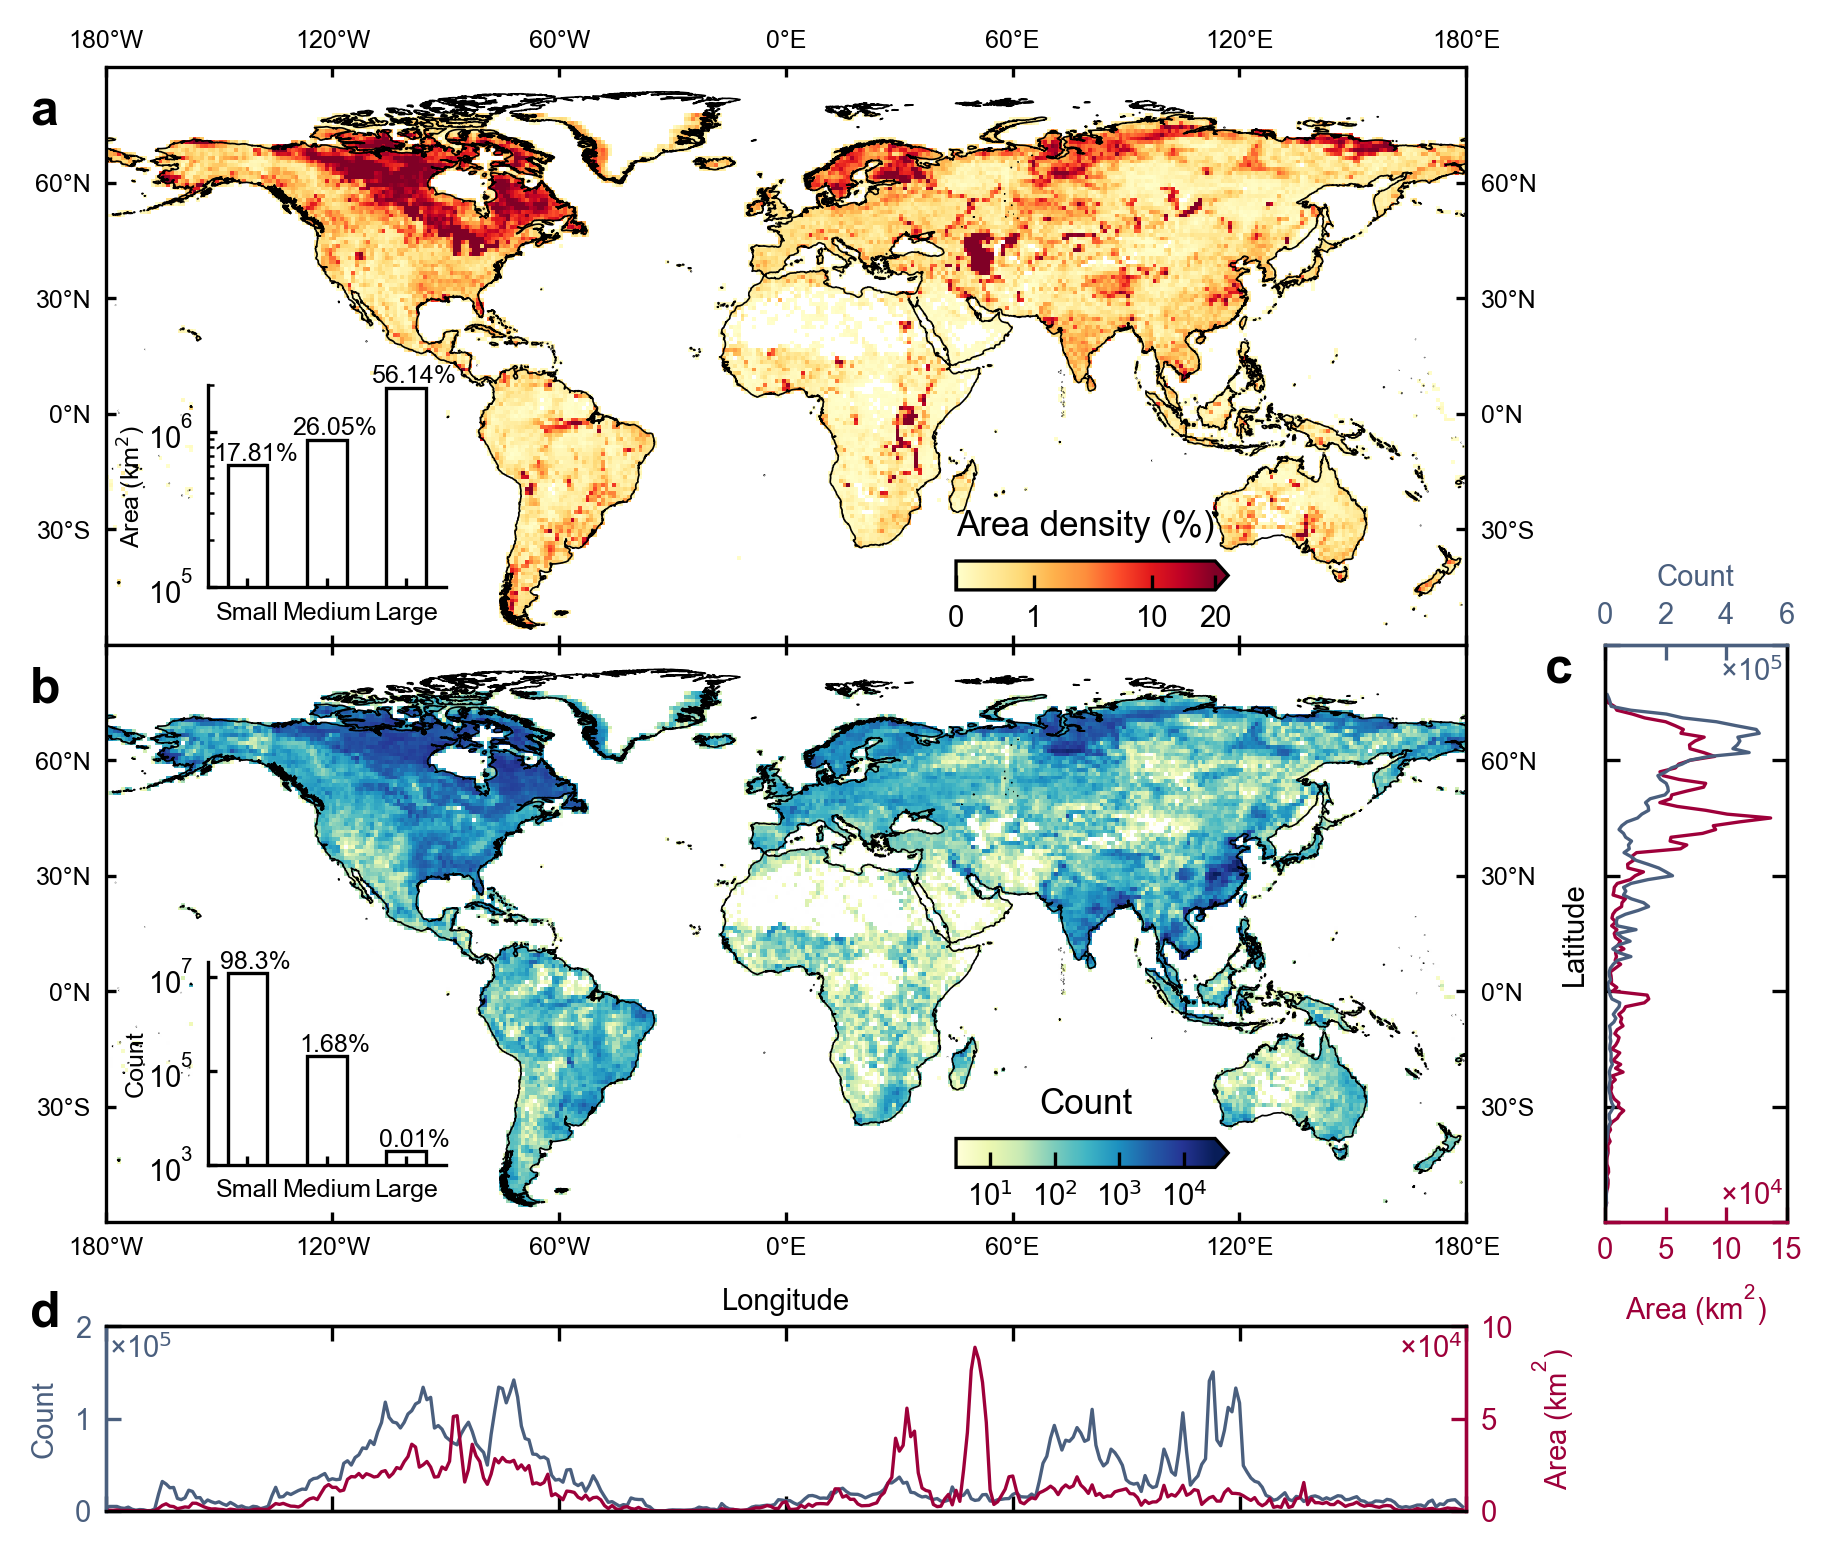

In [10]:
# savepic=os.path.join(fig_path,'3-1 global lake distribution.png')
savepic=os.path.join(fig_path,'Figure6 global lake distribution.png')
fig=plt.figure(figsize=(7.23,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,2,width_ratios=[6,0.8],height_ratios=[2.5,2.5,0.45,0.8],wspace =0.18,hspace =0)

columns=['hu_ap','hu_c0']
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['Area density (%)','Count']
colormap=['YlOrRd','YlGnBu']
norms=[colors.PowerNorm(gamma=0.4,vmin=0.0, vmax=20),colors.LogNorm(vmin=3, vmax=30000)]
ticks=[[0,1,10,20],[0,10,100,1000,10000]]

# ticks=[[0,0.5,3,10,50,100],[0,10,100,1000,10000,100000]]
# norms=[]
# for i in [0,1]:
#     cmap=plt.get_cmap(colormap[i])
#     norms.append(colors.BoundaryNorm(ticks[i], cmap.N))
# 
ax2_list=[]
for k in [0,1]:
    ax=plt.subplot(gs[k, 0])
    RdYlBu_r = plt.cm.get_cmap(colormap[k], 256)#
    newcolors = RdYlBu_r(np.linspace(0,1, 256))
    white = np.array([255/256, 255/256, 255/256,1])
    newcolors[:1, :] = white
    terrain_map = ListedColormap(newcolors)
#     terrain_map=plt.get_cmap(colormap[k])
    axins = ax.inset_axes((0.625, 0.095,0.2,0.05)) 
    legend_kwds={'orientation': "horizontal",'extend':'max','ticks': ticks[k]}
#     if k==0:
#         legend_kwds={'orientation': "horizontal",'ticks': ticks[k]}
#     else:
#         legend_kwds={'orientation': "horizontal",'extend':'max','ticks': ticks[k]}
    add_background_fig(ax,axins,titles[k],latlon_1degree_SJ_last_data,terrain_map,columns[k],legend_kwds,norms[k],False)
    ax.text(-200,75,sub_fig_name[k],fontsize=12,weight='bold')
    
    ax.set_xticks(np.arange(-180, 181, 60))
    ax.set_yticks(np.arange(-30, 61, 30))
    ax.tick_params(axis='both', which='major', length=2.5)
    ax.set_xticklabels([f'{abs(x)}°W' if x < 0 else f'{abs(x)}°E' for x in np.arange(-180, 181, 60)],fontsize=6) 
    ax.set_yticklabels([f'{abs(y)}°S' if y < 0 else f'{abs(y)}°N' for y in np.arange(-30, 61, 30)],fontsize=6)
    if k==0:
        ax.tick_params(axis='y',labelright=True)
        ax.tick_params(axis='x',labeltop=True,labelbottom=False)
    else:
        ax.tick_params(axis='y',labelright=True)
    plt.tick_params(bottom=True, top=True, left=True, right=True)

    if k==1:
        axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks))
    else:
        def custom_ticks_2(x, pos):
            if x==0.5:
                return 0.5
            return int(x)
        axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks_2))
    ax2_list.append(ax.inset_axes((0.075, 0.1,0.175,0.35)))

data=[[606729.6733,887645.6128,1912565.588],[11758786,201172,1911]]
p=[[17.81,26.05,56.14],[98.3,1.68,0.01]]
yrange=[[100000,2000000],[1000,20000000]]
ytick=[[100000,1000000,2000000],[1000,100000,10000000,20000000]]
ylabel=['Area (km$^2$)','Count']
for i in range(2):
    ax2 = ax2_list[i]
    ax2.tick_params(axis='both', which='major', length=2.1)
    ax2.tick_params(axis='y', which='minor', length=1.5)
    ax2.bar(range(0,3),data[i],0.5,facecolor='w',edgecolor='k',linewidth=0.8)
    ax2.set_xticks(range(0,3))
    ax2.set_xticklabels(['Small','Medium','Large'],fontsize=6)
    ax2.set_yscale('log')
    ax2.set_ylim(yrange[i])
    ax2.set_yticks(ytick[i][:-1])
#     ax2.set_yticklabels(ytick[i],fontsize=6)
    ax2.set_xlim([-0.5,2.5])
    for x in range(3):
        ax2.text(x+0.1,data[i][x]+10,f'{p[i][x]}%',fontsize=6,ha='center',va='bottom')
    ax2.set_ylabel(ylabel[i],fontsize=6, labelpad=0)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
## 面积、数量纬度分布图
### 面积
ax2=plt.subplot(gs[1, 1],)
plt.tick_params(bottom=True, top=True, left=True, right=True )
plt.tick_params(labelbottom=False,labeltop=True,labelleft=False, labelright=False)
s=4
x=Lat_data['hu_a0'].values/(10.0**s)
# plt.yticks(visible=False)
draw_line(ax2,[0,15],range(0,16,5),[-60,90],range(-60,91,30),['k','k','#4A5F7E','#9e003a'],'#9e003a','x',x,latitude)
ax2.text(14.7,-57,f'×10$^{s}$',ha='right',va='bottom', color='#9e003a')
ax2.set_ylabel('Latitude')
ax2.text(-5,80,sub_fig_name[2],fontsize=12,weight='bold')
ax2.set_xlabel('Area ($\mathregular{km^2}$)', color='#9e003a')
ax22 = ax2.twiny()
s=5
x=Lat_data['hu_c0'].values/(10.0**s)
draw_line(ax22,[0,6],range(0,7,2),[-60,90],range(-60,91,30),['k','k','#4A5F7E','#9e003a'],'#4A5F7E','x',x,latitude)
ax22.text(5.88,87,f'×10$^{s}$',ha='right',va='top', color='#4A5F7E')
ax22.set_xlabel('Count', color='#4A5F7E')


ax3=plt.subplot(gs[3,0])
plt.tick_params(bottom=True, top=True, left=True, right=True )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
ax3.text(-200,2,sub_fig_name[3],fontsize=12,weight='bold')
s=5
y=Lon_data['hu_c0'].values/(10.0**s)
draw_line(ax3,[-180,180],range(-180,181,60),[0,2],[0,1,2],['#4A5F7E','#9e003a','k','k'],'#4A5F7E','y',longitude,y)
ax3.text(-179,1.92,f'×10$^{s}$',ha='left',va='top', color='#4A5F7E')
ax3.set_xlabel('Longitude')
ax3.xaxis.set_label_position("top")
ax3.set_ylabel('Count', color='#4A5F7E')

ax33 = ax3.twinx()
s=4
y=Lon_data['hu_a0'].values/(10.0**s)
draw_line(ax33,[-180,180],range(-180,181,60),[0,10],range(0,11,5),['#4A5F7E','#9e003a','k','k'],'#9e003a','y',longitude,y)
ax33.set_ylabel('Area ($\mathregular{km^2}$)', color='#9e003a')
ax33.text(179,9.6,f'×10$^{s}$',ha='right',va='top', color='#9e003a')
# plt.tight_layout()
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

In [ ]:
def draw_line_2(ax,xlim,xticks,ylim,yticks,line_color,linewidth,label,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = linewidth,label=label)
    
savepic=os.path.join(fig_path,'3-1_global_lake_distribution_small_lake.png')
fig=plt.figure(figsize=(6.18,6.25),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(4,2,width_ratios=[6,0.8],height_ratios=[0.8,2.5,2.5,0.8],wspace =0.18,hspace =0.18)

columns=['hu_ap','hu_c0']
grid_labels=[[0,0,1,0],[0,0,0,0]]
titles=['Area density (%)','Count']
colormap=['YlOrRd','YlGnBu']
ticks=[[0,0.5,3,10,50,100],[0,10,100,1000,10000,100000]]
norms=[]
for i in [0,1]:
    cmap=plt.get_cmap(colormap[i])
    norms.append(colors.BoundaryNorm(ticks[i], cmap.N))
    
## 面积、数量纬度分布图
### a 经度面积
ax1=plt.subplot(gs[0, 0],)
ax1.text(-175,7.5,sub_fig_name[0],fontsize=12,weight='bold')
s=4
y=Lon_data['hu_a0'].values/(10.0**s)
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[0],0.8,'total',longitude,y)
y=Lon_data['hu_a1'].values/(10.0**s)#GL_c0
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[2],0.6,'area < 0.1 km$^2$',longitude,y)
y=y+Lon_data['hu_a10'].values/(10.0**s)#GL_c0
draw_line_2(ax1,[-180,180],range(-180,181,60),[0,10],[0,5,10],red_color_list[1],0.6,'0.1 ≤ area < 1 km$^2$',longitude,y)
ax1.legend(loc=(1, 0.02),frameon=False)
ax1.text(-180,10,f'×10$^{s}$',ha='left',va='bottom', color='k')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Area (km$^2$)', color='k')

## b 格网面积
ax=plt.subplot(gs[1, 0])
ax.text(-175,75,sub_fig_name[1],fontsize=12,weight='bold')
terrain_map=plt.get_cmap(colormap[0])
axins = ax.inset_axes((0.03, 0.1,0.22,0.05)) 
legend_kwds={'orientation': "horizontal",'ticks': ticks[0]}
add_background_fig(ax,axins,titles[0],latlon_1degree_SJ_last_data,terrain_map,columns[0],legend_kwds,norms[0],False)
def custom_ticks_2(x, pos):
    if x==0.5:
        return 0.5
    return int(x)
axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks_2))

## c 纬度面积
ax2=plt.subplot(gs[1, 1])
ax2.text(2,77,sub_fig_name[2],fontsize=12,weight='bold')
s=4
x=Lat_data['hu_a0'].values/(10.0**s)
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[0],0.8,'total',x,latitude)
x=Lat_data['hu_a1'].values/(10.0**s)#GL_c0
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[2],0.6,'area < 0.1 km$^2$',x,latitude)
x=x+Lat_data['hu_a10'].values/(10.0**s)#GL_c0
draw_line_2(ax2,[0,15],[0,5,10,15],[-60,90],range(-60,91,30),red_color_list[1],0.6,'0.1< area < 0.1 km$^2$',x,latitude)

ax2.set_ylabel('Latitude')
ax2.set_xlabel('Count')
ax2.text(15.5,-60,f'×10$^{s}$',ha='left',va='bottom', color='k')

## d 格网数量
ax3=plt.subplot(gs[2, 0])
ax3.text(-175,75,sub_fig_name[3],fontsize=12,weight='bold')
terrain_map=plt.get_cmap(colormap[1])
axins_3 = ax3.inset_axes((0.03, 0.1,0.22,0.05)) 
legend_kwds={'orientation': "horizontal",'ticks': ticks[1]}
add_background_fig(ax3,axins_3,titles[1],latlon_1degree_SJ_last_data,terrain_map,columns[1],legend_kwds,norms[1],False)
axins_3.xaxis.set_major_formatter(ticker.FuncFormatter(custom_ticks))

### e.纬度数量
ax4=plt.subplot(gs[2, 1],)
ax4.text(0.75,77,sub_fig_name[4],fontsize=12,weight='bold')
s=5
x=Lat_data['hu_c0'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-1],0.8,'total',x,latitude)
x=Lat_data['hu_c1'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-3],0.6,'area < 0.1 km$^2$',x,latitude)
x=x+Lat_data['hu_c10'].values/(10.0**s)
draw_line_2(ax4,[0,6],range(0,7,2),[-60,90],range(-60,91,30),color_list[-2],0.6,'0.1< area < 0.1 km$^2$',x,latitude)

ax4.set_ylabel('Latitude')
ax4.set_xlabel('Count')
ax4.text(6.2,-60,f'×10$^{s}$',ha='left',va='bottom', color='k')

### f.经度数量
ax5=plt.subplot(gs[3,0])
ax5.text(-175,1.4,sub_fig_name[5],fontsize=12,weight='bold')
s=5
y=Lon_data['hu_c0'].values/(10.0**s)
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-1],0.8,'total',longitude,y)
y=Lon_data['hu_c1'].values/(10.0**s)#GL_c0
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-3],0.6,'area < 0.1 km$^2$',longitude,y)
y=y+Lon_data['hu_c10'].values/(10.0**s)#GL_c0
draw_line_2(ax5,[-180,180],range(-180,181,60),[0,2],[0,1,2],color_list[-2],0.6,'0.1 ≤ area < 1 km$^2$',longitude,y)
ax5.legend(loc=(1, 0.02),frameon=False)
ax5.text(-180,2,f'×10$^{s}$',ha='left',va='bottom', color='k')
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Count', color='k')
# # plt.tight_layout()
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

In [ ]:
Lat_data.to_excel(r'D:\lakemapping\10_paper_writting\data_lat_distribution.xlsx',index=False)

In [ ]:
Lon_data.to_excel(r'D:\lakemapping\10_paper_writting\data_lon_distribution.xlsx',index=False)